In [1]:
# Import dependencies

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import collections
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set()

In [4]:
# import dataset

In [5]:
df = pd.read_csv(r'Adult.csv') 

### Exploratory Data Analysis

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df.shape

(48842, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [12]:
#Statistical Measure

In [11]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
#50% sample dataset

In [15]:
df.sample(frac=0.5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
45504,43,Self-emp-not-inc,160369,10th,6,Divorced,Farming-fishing,Unmarried,White,Male,0,0,25,United-States,<=50K
15585,37,Self-emp-inc,152414,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
3647,76,Private,138403,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,20,United-States,<=50K
33159,30,?,197827,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
7991,52,Federal-gov,165998,Prof-school,15,Married-civ-spouse,Armed-Forces,Husband,White,Male,7298,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,48,Private,162236,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,>50K
35260,44,Private,86298,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
15692,48,Private,213140,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
29518,23,Private,315065,10th,6,Never-married,Other-service,Unmarried,White,Male,0,0,60,Mexico,<=50K


In [17]:
#invalid values check

In [18]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [22]:
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

In [23]:
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [31]:
# check duplicate rows

In [30]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

       age         workclass  fnlwgt     education  educational-num  \
864     24           Private  194630     Bachelors               13   
11189   37           Private   52870     Bachelors               13   
11212   29           Private   36440     Bachelors               13   
13848   30           Private  180317     Assoc-voc               11   
15960   18      Self-emp-inc  378036          12th                8   
18476   39           Private  184659       HS-grad                9   
19399   19           Private  130431       5th-6th                3   
19726   41           Private  116391     Bachelors               13   
20606   25           Private  308144     Bachelors               13   
21162   25           Private  308144     Bachelors               13   
21385   90           Private   52386  Some-college               10   
24361   21           Private  243368     Preschool                1   
25189   29               NaN   41281     Bachelors               13   
25452 

In [34]:
df.drop_duplicates(inplace = True)

In [35]:
df.shape

(48790, 15)

In [36]:
# drop col education-num, capital gain, capital loss, beacuse 75% value is 0 for the laster 2 and edu-sum values already depicted in prev col

In [37]:
df.drop(columns =['educational-num','capital-gain','capital-loss'], inplace = True)

In [39]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,NaN,103497,Some-college,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K


# Univarate Analysis

In [40]:
# distribution of age column

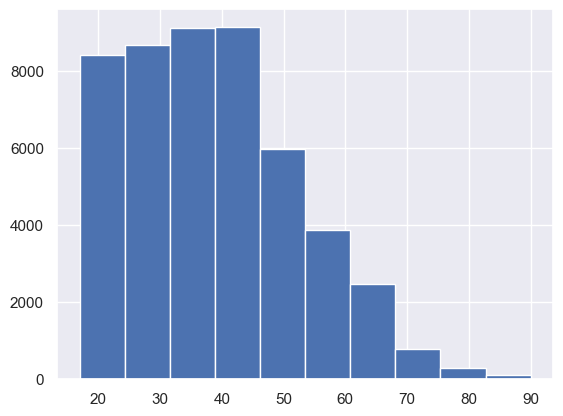

In [58]:
df['age'].hist()
plt.show()

In [59]:
# find total no of people aged between 17 and 48 

In [62]:
df[df['age'].between(17,48)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,NaN,103497,Some-college,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48834,32,Private,116138,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,<=50K
48836,22,Private,310152,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K


In [63]:
# distributio9n of work class col

In [67]:
df2 = df['workclass'].value_counts()
df2

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

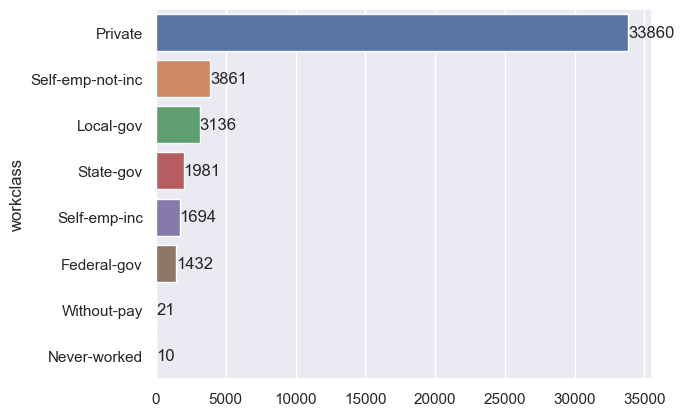

In [78]:
ax = sns.barplot(x=df2.values, y=df2.index)
ax.bar_label(ax.containers[0])
plt.show()

In [75]:
# How many persons has bachelors or masters degrre ?

In [82]:
df[df['education'].isin(['Bachelors','Masters'])]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
11,36,Federal-gov,212465,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,<=50K
15,43,Private,346189,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
20,34,Private,107914,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,47,United-States,>50K
23,25,Private,220931,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,43,Peru,<=50K
24,25,Private,205947,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48817,34,Private,160216,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,55,United-States,>50K
48819,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,45,United-States,>50K
48825,31,Private,199655,Masters,Divorced,Other-service,Not-in-family,Other,Female,30,United-States,<=50K
48834,32,Private,116138,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,<=50K


# Bivarate Analysis

<Axes: xlabel='income', ylabel='age'>

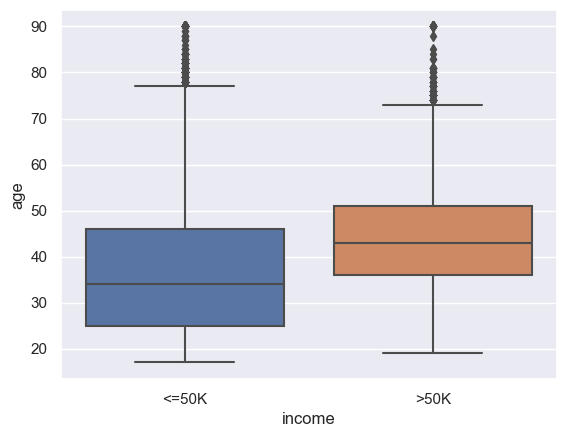

In [85]:
sns.boxplot(x= 'income', y = 'age', data = df)

In [86]:
#income distribution

In [100]:
df3 = df['income'].value_counts()
df3

income
<=50K    37109
>50K     11681
Name: count, dtype: int64

<Axes: xlabel='income'>

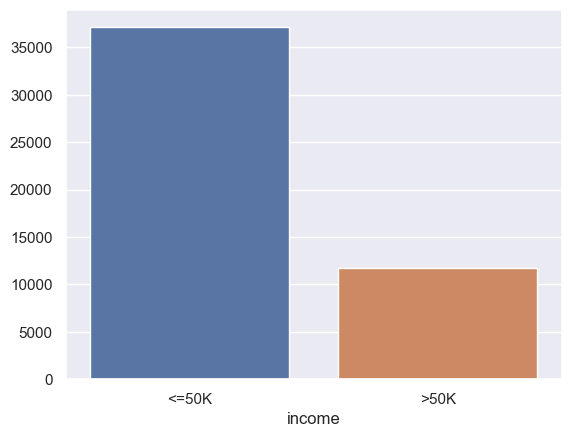

In [101]:
sns.barplot(x = df3.index, y =df3.values)

In [102]:
# which work class getting highest salary

In [109]:
df4 = df[df['income']=='>50K']
df4

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
7,63,Self-emp-not-inc,104626,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K
10,65,Private,184454,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
14,48,Private,279724,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,48,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48820,71,NaN,287372,Doctorate,Married-civ-spouse,NaN,Husband,White,Male,10,United-States,>50K
48826,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,United-States,>50K
48835,53,Private,321865,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K


In [112]:
df4.groupby('workclass')['income'].count().sort_values(ascending = False)

workclass
Private             7381
Self-emp-not-inc    1077
Self-emp-inc         938
Local-gov            927
Federal-gov          561
State-gov            530
Without-pay            2
Name: income, dtype: int64

-> Private 7381